In [1]:
import tensorflow as tf
import os

# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
    
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import datetime

In [3]:
data_dir = './dataSet/'
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
batch_size = 16
img_height = 256
img_width = 256
train_ds = train_datagen.flow_from_directory(data_dir,
                                             target_size=(img_height, img_width),
                                             batch_size=batch_size,
                                             class_mode='categorical')
test_ds = test_datagen.flow_from_directory(data_dir,
                                           target_size=(img_height, img_width),
                                           batch_size=batch_size,
                                           class_mode='categorical')

Found 13031 images belonging to 15 classes.
Found 13031 images belonging to 15 classes.


In [5]:
num_classes = 15
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [6]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau,TensorBoard
early_stopping = EarlyStopping(monitor = 'val_accuracy', 
                               patience = 3, 
                               min_delta = 0.01, 
                               verbose = 1
                              )
log_dir = "logs/SequentialModel_v3/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir = log_dir, histogram_freq = 1)
modelcheckpoint = ModelCheckpoint(filepath = 'models/version_3/SequentialModel_v3.h5' ,
                                  monitor = 'val_accuracy', 
                                   patience = 3, 
                                   min_delta = 0.01, 
                                   verbose = 1,
                                   save_best_only = True
                                 )
reduce_lr = ReduceLROnPlateau(monitor = 'loss', 
                              factor = 0.2, 
                              patience = 3, 
                              min_lr = 0.00001, 
                              verbose = 1)
callbacks = [early_stopping,reduce_lr,tensorboard_callback,modelcheckpoint]

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds,
                    epochs=50,
                    validation_data=test_ds,
                    callbacks = callbacks)

Epoch 1/50
815/815 [==============================] - ETA: 0s - loss: 1.1613 - accuracy: 0.5903
Epoch 1: val_accuracy improved from -inf to 0.67685, saving model to models/version_3\SequentialModel_v3.h5
815/815 [==============================] - 205s 245ms/step - loss: 1.1613 - accuracy: 0.5903 - val_loss: 0.8332 - val_accuracy: 0.6768 - lr: 0.0010
Epoch 2/50
815/815 [==============================] - ETA: 0s - loss: 0.6220 - accuracy: 0.7723
Epoch 2: val_accuracy improved from 0.67685 to 0.88036, saving model to models/version_3\SequentialModel_v3.h5
815/815 [==============================] - 191s 234ms/step - loss: 0.6220 - accuracy: 0.7723 - val_loss: 0.3509 - val_accuracy: 0.8804 - lr: 0.0010
Epoch 3/50
815/815 [==============================] - ETA: 0s - loss: 0.4317 - accuracy: 0.8457
Epoch 3: val_accuracy improved from 0.88036 to 0.90369, saving model to models/version_3\SequentialModel_v3.h5
815/815 [==============================] - 203s 249ms/step - loss: 0.4317 - accuracy: 

In [8]:
loss, accuracy = model.evaluate(test_ds)
print(f'Test accuracy: {accuracy}')

815/815 [==============================] - 33s 40ms/step - loss: 0.1117 - accuracy: 0.9602
Test accuracy: 0.9602486491203308


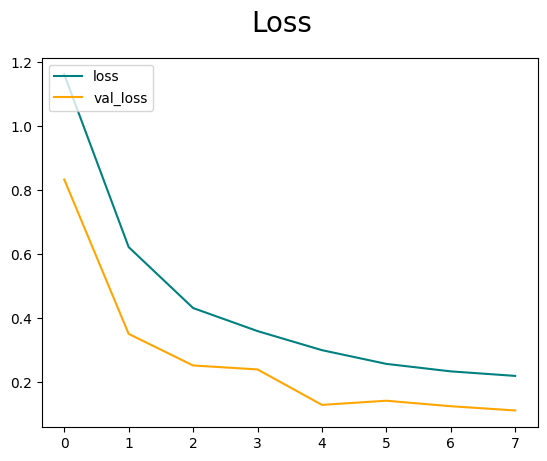

In [9]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

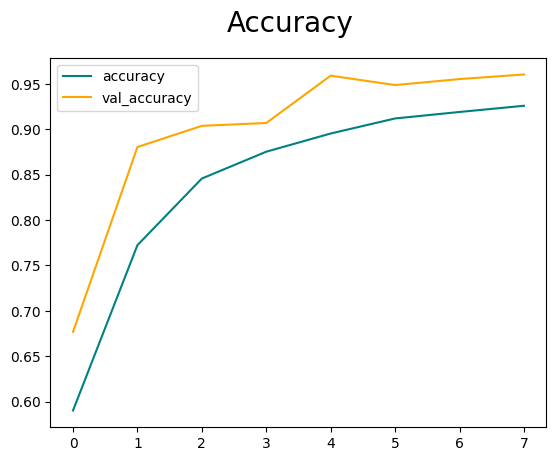

In [10]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [11]:
from tensorflow.keras.models import load_model
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [14]:
newmodel = load_model('./models/version_3/SequentialModel_v3.h5')

model_metrics = newmodel.evaluate(test_ds)
print("Accuracy of the model is ",model_metrics[1] * 100, "%")

815/815 [==============================] - 30s 36ms/step - loss: 0.1117 - accuracy: 0.9602
Accuracy of the model is  96.02486491203308 %


In [37]:
class_names = list(train_ds.class_indices.keys())

In [38]:
class_names

['.ipynb_checkpoints',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Cotton___Aphids',
 'Cotton___Army_worm',
 'Cotton___Bacterial_Blight',
 'Cotton___Healthy',
 'Cotton___Powdery_Mildew',
 'Grape___Black_rot',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy']

In [39]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

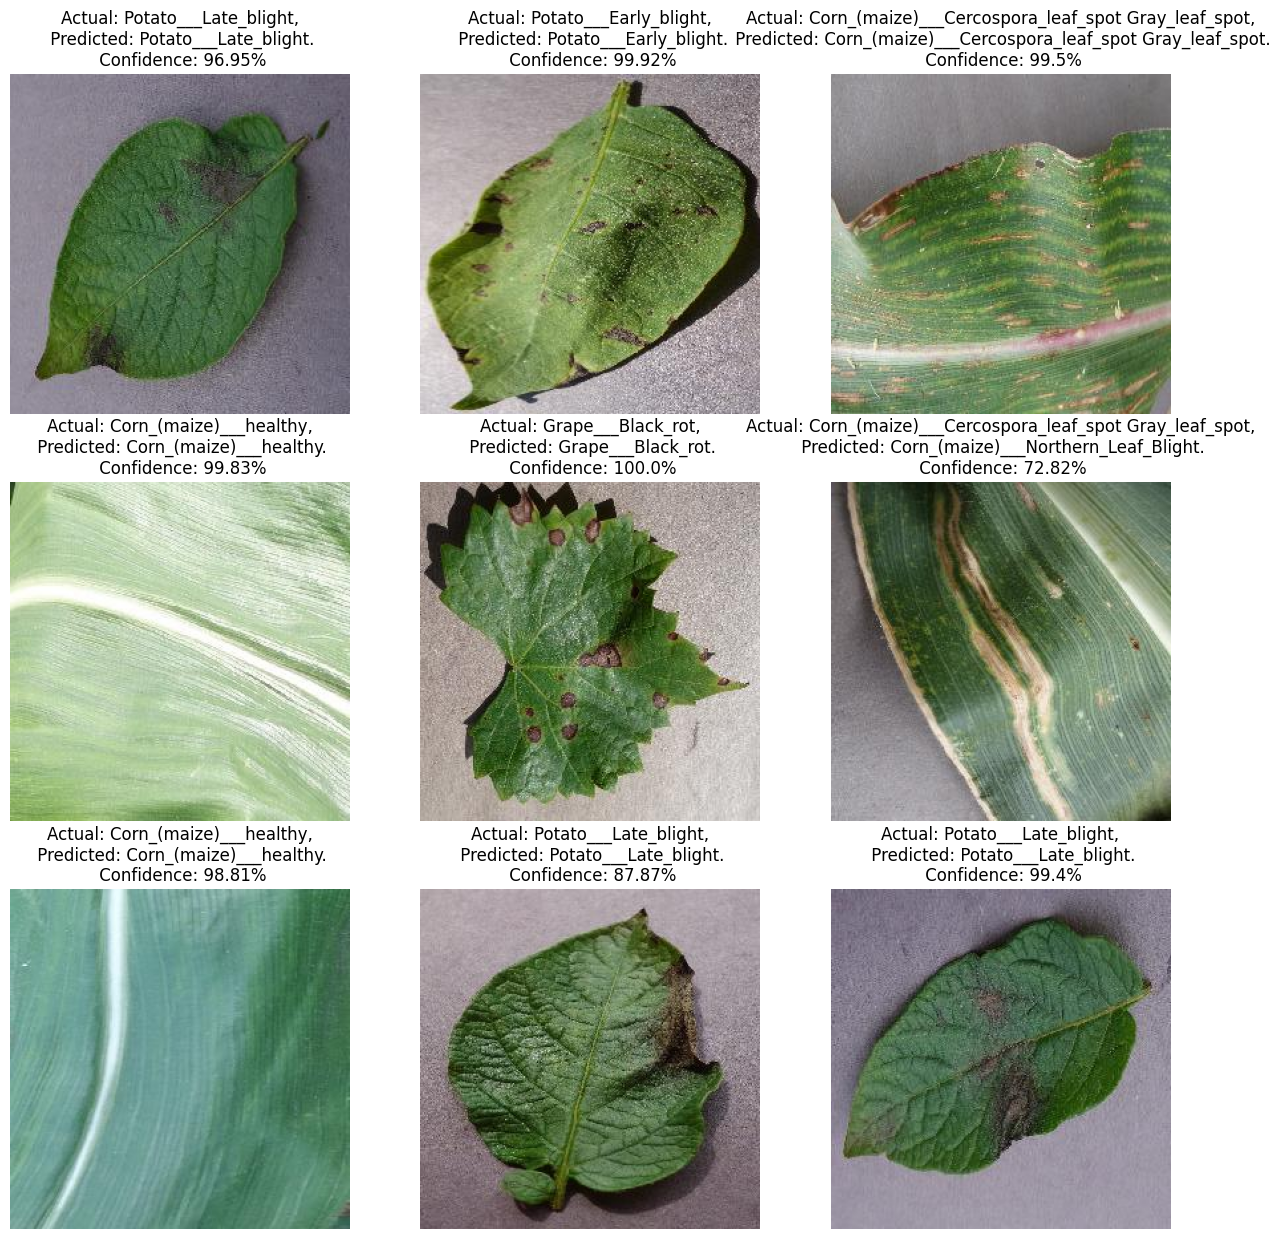

In [43]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[np.argmax(labels[i])]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [44]:
# Convert the model to a TFLite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('models/version_2/SequentialModel_v3.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\jP\AppData\Local\Temp\tmp0i6dof6g\assets


In [7]:
import tensorflow as tf
import os
# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="models/version_2/SequentialModel_v3.tflite")
interpreter.allocate_tensors()

In [8]:
# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
# Evaluate the model on the testing dataset
test_accuracy = tf.keras.metrics.CategoricalAccuracy()
for images, labels in test_ds:
    for i in range(batch_size - 10):
        image = images[i:i+1]
        label = labels[i:i+1]
        interpreter.set_tensor(input_details[0]['index'], image)
        interpreter.invoke()
        output_data = interpreter.get_tensor(output_details[0]['index'])
        test_accuracy.update_state(label, output_data)
print(f'Test accuracy: {test_accuracy.result()}')
